In [12]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Function for reading the data:
def read_customer_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [14]:
df = read_customer_data()

In [15]:
list(df)

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [16]:
#Function for standardizing column names:
def standardize(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [17]:
#Function for dropping customer and unnamed:_0 columns
def drop_2cols(df):
    df.drop(columns=["unnamed:_0", "customer"], inplace=True)
    return df

In [18]:
#Drop duplicates and reset index
def dd(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [19]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    df["vehicle_type"] = df["vehicle_type"].fillna(value="M")
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

In [20]:
#Creating a months column for the effective_to_date column only
def month_creation(df):
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month_effective_to_date"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return(df)

### Running the rest of the Pipeline

In [21]:
df = standardize(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [22]:
df = month_creation(df)

In [23]:
df= drop_2cols(df)

In [24]:
df = dd(df)

In [25]:
df = fill_null(df)

In [34]:
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10772,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10773,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10774,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  datetime64[ns]
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [36]:
## Export the DataFrame into a CSV and import it to Tableau for visualization
## like this you will save it in the same folder as the notebook is saved

df.to_csv("customer_analysis_clean.csv", index = False)


In [37]:
df2 = pd.read_csv("customer_analysis_clean.csv")
df2

,Unnamed: 0,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,10771,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10772,10772,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10773,10773,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10774,10774,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [18]:
df["vehicle_type"].value_counts()

M    5416
A    5360
Name: vehicle_type, dtype: int64

<AxesSubplot:>

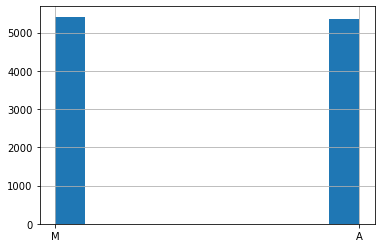

In [19]:
df["vehicle_type"].hist()

## Activity 5

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [ ]:
df.info()

In [20]:
# Identify all the cathegorical columns 
[col for col in df.columns if not col in df._get_numeric_data().columns]

['state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

In [23]:
# save a new subset -> numerical columns as the new DF
numerical = df._get_numeric_data()

In [22]:
# save a new subset -> cathegorical columns as the new DF
categorical=[i for i in df.columns if df.dtypes[i]=='object']
categorical

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_effective_to_date']

### Check for Outliers: Use the boxplot for looking at the values for income


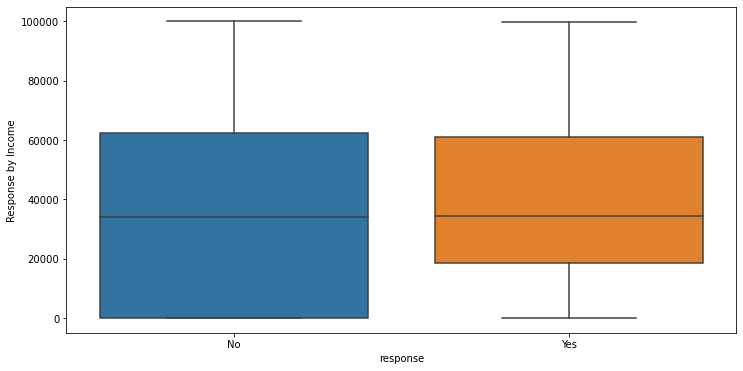

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=df)
plt.ylabel('Response by Income')
plt.show()

Findings:
We can see that the response rate by income is quite similar but for the ones that have low incomes. There you clearly see that a lot of low income people dont response whereas only very little do respond up to the level of 20k.

### Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution


In [25]:
# Identify all the numerical columns 
[col for col in df.columns if col in df._get_numeric_data().columns]

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [26]:
numerical["customer_lifetime_value"].value_counts()

7507.455372     11
5504.139033     11
13727.799720    10
5181.620895     10
4250.282624     10
                ..
8485.385641      1
8400.788878      1
5525.836623      1
3768.086327      1
6051.799036      1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [27]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.710885,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306,434.759809
std,6885.053012,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228,292.452845
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,270.290316
50%,5774.709107,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000,383.403043
75%,8991.339270,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


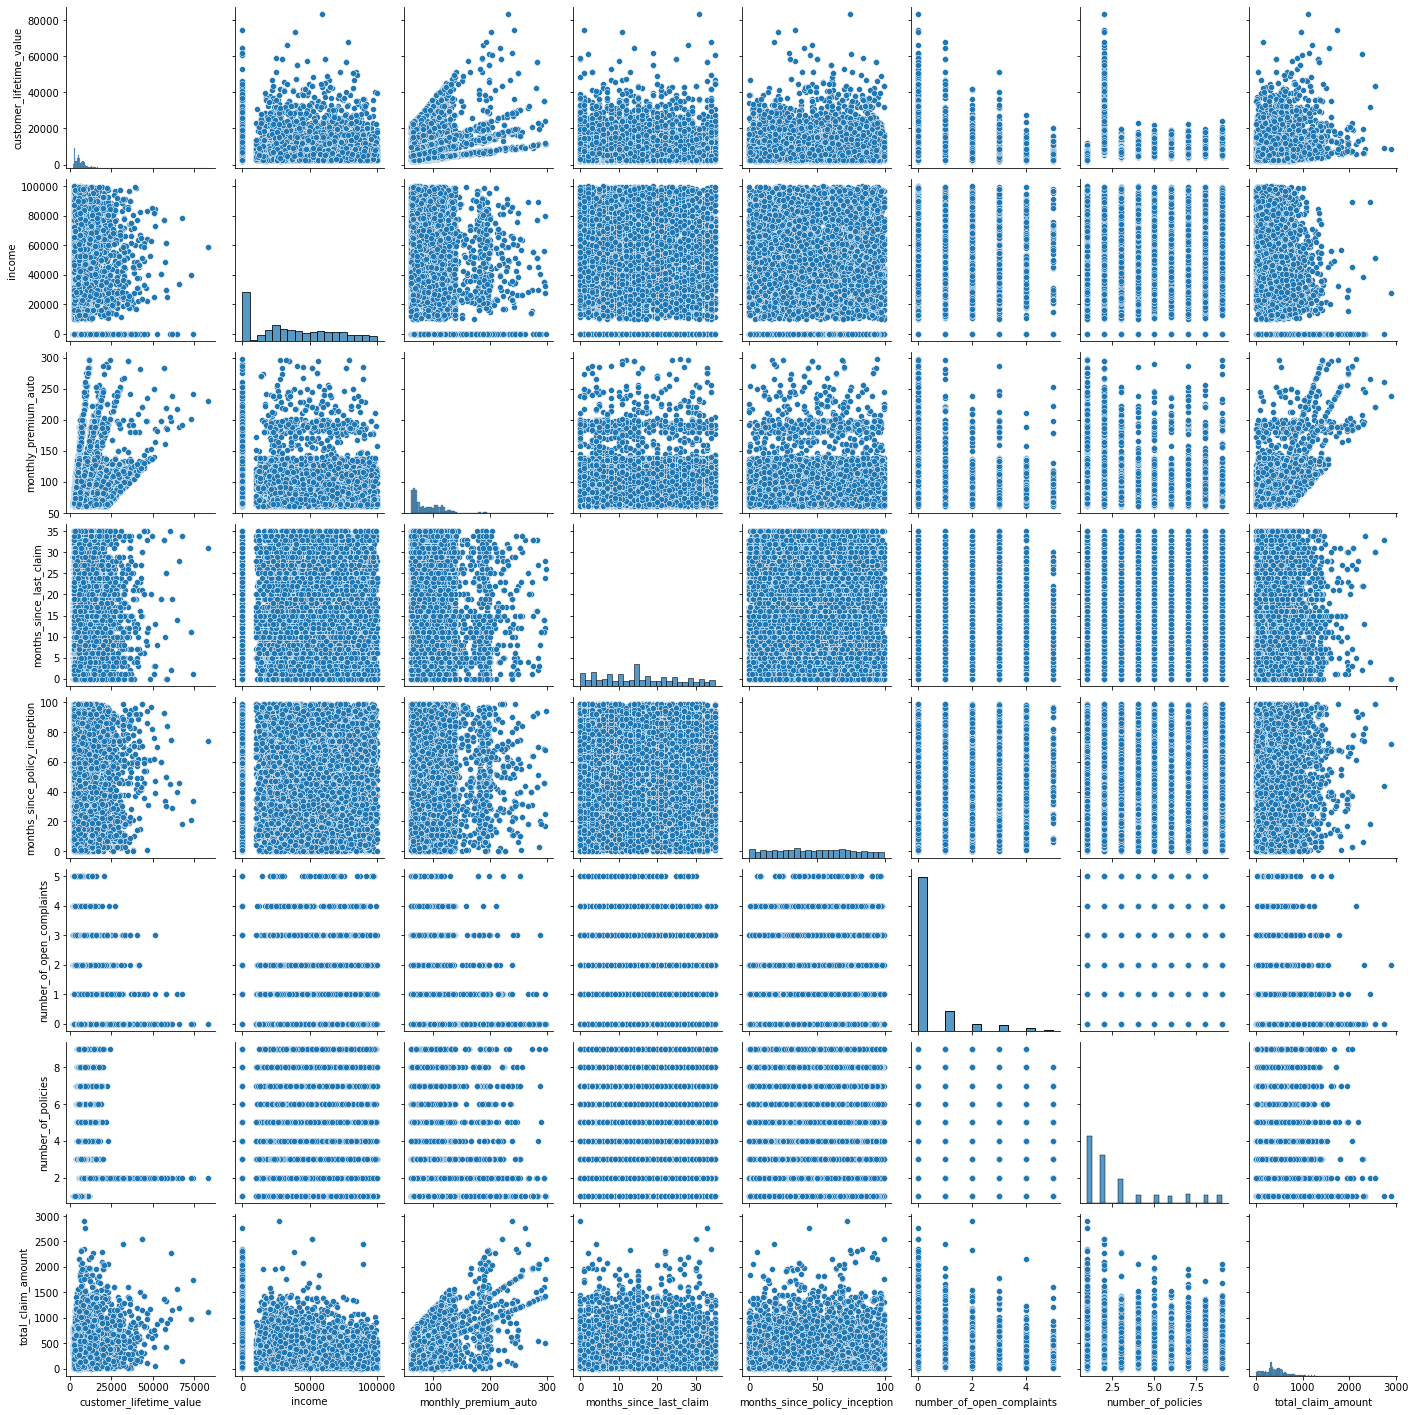

In [28]:
sns.pairplot(df)
plt.show()

Finding:
We see that that total_claim_amount and monthly_premium_auto could have a correlation somehow.

### Do some normalization on the features

C:\Users\Fredo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

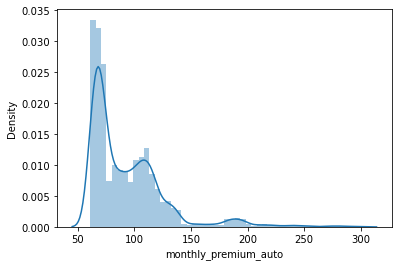

In [92]:
# Use seaborn library to construct distribution plots for the numerical variables
# -> probablity density function

sns.distplot(numerical["monthly_premium_auto"], hist=True)

# FINDING: Looks like a LogNromal distribution and should be changed to a more normal distribution

In [107]:
# Using Box-Cox Normalization method without lambda, seamingly calculating the optimal lambda

from scipy.stats import boxcox

monthly,l=boxcox(numerical['monthly_premium_auto'])
# the l after monthly is the optimal lambda calculated


In [108]:
monthly,l

(array([0.6830305 , 0.683145  , 0.68389994, ..., 0.6844251 , 0.68430026,
        0.68391179]),
 -1.4604478780820638)

<AxesSubplot:ylabel='Count'>

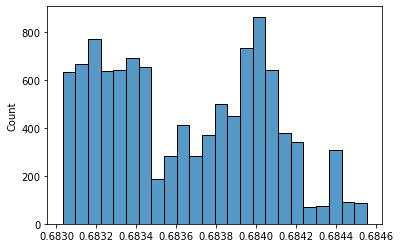

In [109]:
sns.histplot(monthly)

In [110]:
# Using Box-Cox Normalization method with lamda=0.02

from scipy.stats import boxcox

monthly11=boxcox(numerical['monthly_premium_auto'],lmbda=0.02)



<AxesSubplot:ylabel='Count'>

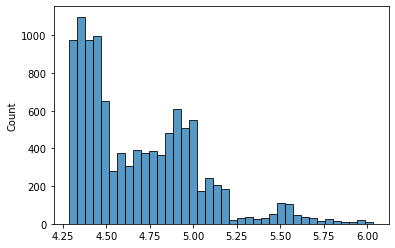

In [111]:
sns.histplot(monthly11)


In [73]:
numerical["customer_lifetime_value"].describe()

count    10776.000000
mean      8016.710885
std       6885.053012
min       1898.007675
25%       4014.453113
50%       5774.709107
75%       8991.339270
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [90]:
# Power Transformer -> normalize the data between -2 and 2

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
customer_lifetime_value_normalized = pt.fit_transform(numerical["monthly_premium_auto"].to_numpy().reshape(-1,1))



<AxesSubplot:ylabel='Count'>

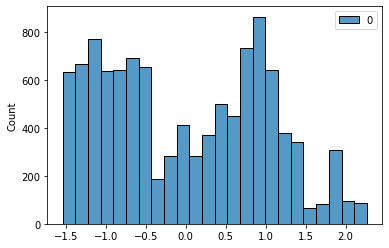

In [91]:
sns.histplot(customer_lifetime_value_normalized)

In [88]:
# Quantile Transformer

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer()

monthly2=qt.fit_transform(numerical['monthly_premium_auto'].to_numpy().reshape(-1,1))


<AxesSubplot:ylabel='Count'>

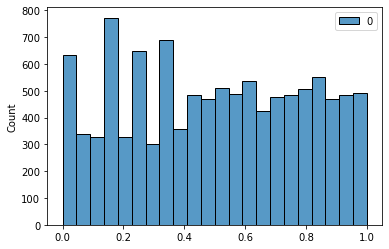

In [89]:
sns.histplot(monthly2)

C:\Users\Fredo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

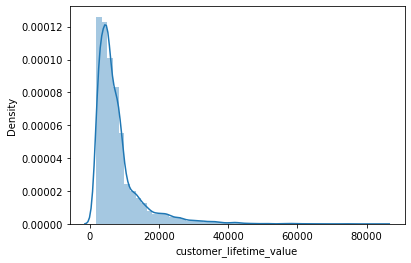

In [114]:
sns.distplot(numerical["customer_lifetime_value"], hist=True)


In [112]:
# Using Box-Cox Normalization method without lambda, seamingly calculating the optimal lambda

from scipy.stats import boxcox

monthly12,l=boxcox(numerical['customer_lifetime_value'])
# the l after monthly is the optimal lambda calculated

<AxesSubplot:ylabel='Count'>

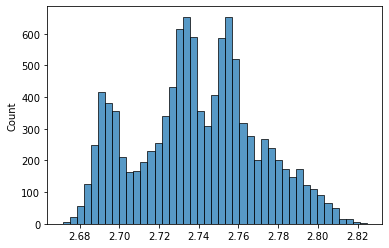

In [113]:
sns.histplot(monthly12)

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='total_claim_amount'>

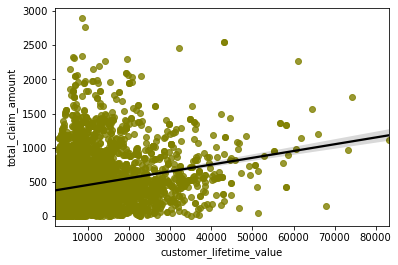

In [39]:
# PLOT FITTED LINE Between two (best) correlating variables/features 

sns.regplot(x='customer_lifetime_value',y='total_claim_amount', data=numerical, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

C:\Users\Fredo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

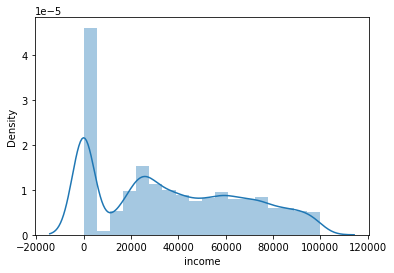

In [40]:
sns.distplot(numerical["income"], hist=True)

C:\Users\Fredo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

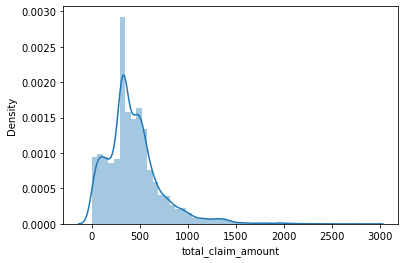

In [41]:
sns.distplot(numerical["total_claim_amount"], hist=True)

In [ ]:
from matplotlib import pyplot
pyplot.plot(numerical["total_claim_amount"])
pyplot.show()

# histogram
pyplot.hist(numerical["total_claim_amount"])
pyplot.show()

In [ ]:
# looks like a uniform distirbution

sns.distplot(numerical["number_of_policies"], hist=True)

In [ ]:
# plot the histogram
plt.hist(numerical["total_claim_amount"], bins=10, density=True)


###  Normalize (numericals)

### MAX ABSOLUTE SCALING


In [115]:
# copy the data
numerical_max_scaled = numerical.copy()

In [116]:
# apply the normalization technique
for column in numerical_max_scaled.columns:
    numerical_max_scaled[column] = numerical_max_scaled[column]  / numerical_max_scaled[column].abs().max()
    
# view normalized data
display(numerical_max_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.057716,0.480381,0.204698,0.200000,0.525253,0.0,1.000000,0.101201
1,0.026745,0.000000,0.214765,0.085714,0.262626,0.0,0.111111,0.257471
2,0.179392,0.221432,0.335570,0.971429,0.313131,0.0,0.222222,0.165904
3,0.268015,0.490873,0.325503,0.285714,0.030303,0.0,0.222222,0.167291
4,0.108311,0.236795,0.392617,0.428571,0.313131,0.0,0.777778,0.244683
...,...,...,...,...,...,...,...,...
10771,0.186778,0.000000,0.848993,0.428571,0.404040,0.0,0.777778,0.419737
10772,0.063119,0.611576,0.218121,0.200000,0.686869,0.0,0.666667,0.094364
10773,0.286747,0.398446,0.674497,0.314286,0.636364,0.0,0.222222,0.131792
10774,0.143677,0.642072,0.530201,0.000000,0.272727,0.8,0.666667,0.213701


### Using The MIN-MAX FEATURE SCALING


In [117]:
# copy the data
numerical_min_max_scaled = numerical.copy()
  
# apply normalization technique
for column in numerical_min_max_scaled.columns:
    numerical_min_max_scaled[column] = (numerical_min_max_scaled[column] - numerical_min_max_scaled[column].min()) / (numerical_min_max_scaled[column].max() - numerical_min_max_scaled[column].min())    
  
# view normalized data
numerical_min_max_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,0.428571,0.313131,0.0,0.750,0.244657
...,...,...,...,...,...,...,...,...
10771,0.167823,0.000000,0.810127,0.428571,0.404040,0.0,0.750,0.419717
10772,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
10773,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763
10774,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213674


C:\Users\Fredo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

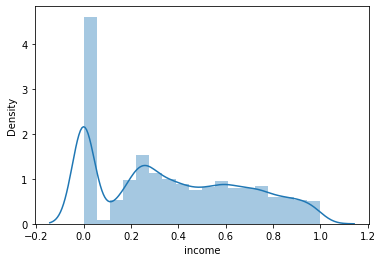

In [118]:
sns.distplot(numerical_min_max_scaled["income"], hist=True)

### Using The Z-SCORE METHOD -> Huge Benefit

In [119]:
# -> HUGE BENEFIT TO TAKE MULTIPLE NUMERICAL independent VARIABLES INTO A MODEL. They are same scaled!


# copy the data
numerical_z_scaled = numerical.copy()
  
# apply normalization techniques
for column in numerical_z_scaled.columns:
    numerical_z_scaled[column] = (numerical_z_scaled[column] -
                           numerical_z_scaled[column].mean()) / numerical_z_scaled[column].std()    
  
# view normalized data   
display(numerical_z_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465863,0.344937,-0.935817,-0.831982,0.138905,-0.407032,2.510476,-0.485411
1,-0.840689,-1.235090,-0.848630,-1.240896,-0.792053,-0.407032,-0.825320,1.060563
2,1.006703,-0.506775,0.197617,1.928187,-0.613022,-0.407032,-0.408346,0.154692
3,2.079247,0.379447,0.110430,-0.525296,-1.615592,-0.407032,-0.408346,0.168416
4,0.146456,-0.456245,0.691678,-0.014154,-0.613022,-0.407032,1.676527,0.934051
...,...,...,...,...,...,...,...,...
10771,1.096093,-1.235090,4.644164,-0.014154,-0.290768,-0.407032,1.676527,2.665866
10772,-0.400471,0.776452,-0.819567,-0.831982,0.711801,-0.407032,1.259553,-0.553049
10773,2.305951,0.075442,3.132919,-0.423068,0.532771,-0.407032,-0.408346,-0.182774
10774,0.574472,0.876756,1.883236,-1.547581,-0.756247,4.093920,1.259553,0.627551


### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

<AxesSubplot:>

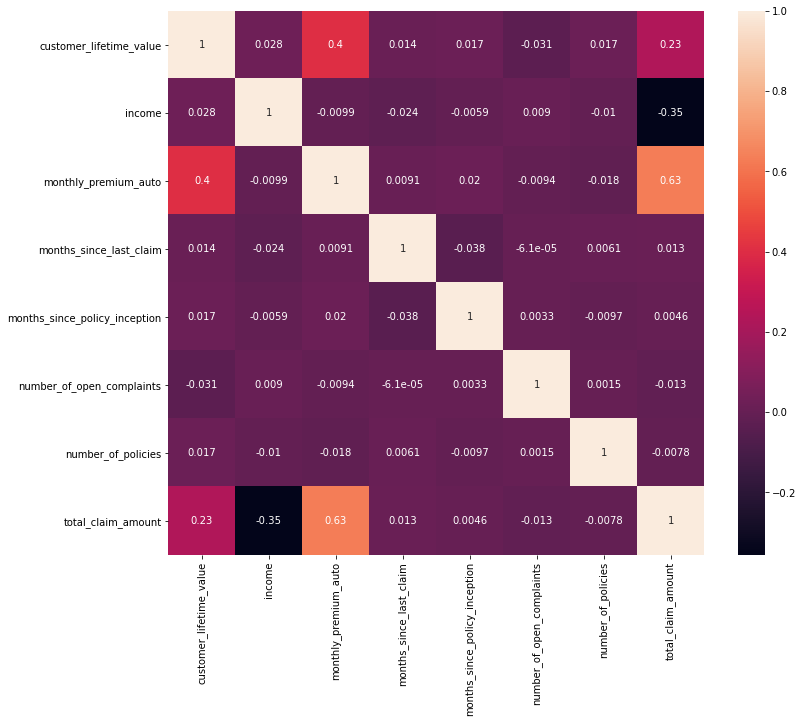

In [120]:
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(numerical.corr(), annot = True, ax=ax)

FINDING: Largest positive correlation is between total_claim_amount and monthly_premium_auto
this can be explained by more expensive cars require higher premium payments
and if there is a damage, these more expensive cars create higher claim amounts.

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable

RESULT: As we can see in the correlation coefficient matrix above, there is no independent 
variables/features with a higher correlation than plus/minus 0.9. Hence, we dont drop any of them.

## Transform Categorical Values

### Get cathegorical Columns

In [121]:
categoricals = df.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month_effective_to_date
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M,February
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M,January
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M,January


### Conduct One Hot Encoder data fitting on policy type

In [122]:
categoricals["policy_type"].value_counts()

Personal Auto     8016
Corporate Auto    2319
Special Auto       441
Name: policy_type, dtype: int64

In [123]:
from sklearn import preprocessing

In [124]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
X = [["Personal Auto", 1], ["Corporate Auto", 2], ["Special Auto", 3]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [125]:
input_data = pd.DataFrame ([["Personal Auto", 1], ["Corporate Auto", 2], ["Special Auto", 3]])

In [126]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
enc.fit_transform(input_data).toarray()

array([[0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [127]:
### work with two categorical variables.
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
categorical_hot_encoder = enc.fit_transform(np.array(categoricals.loc[:,["policy_type","marital_status"]])).toarray()

In [128]:
categorical_hot_encoder 

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

### Put the cathegorical clumns into numerical binary values

In [129]:
categorical_numerical =pd.get_dummies(categoricals)
categorical_numerical


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A,vehicle_type_M,month_effective_to_date_February,month_effective_to_date_January
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
10772,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10773,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
10774,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0


COMMENT FOR STUFF BELOW: We tried to get the above numerical results into the respective cathegorical column. Unfortunately did not work

In [132]:
def numericalize_policy_type(n_p_t):
    categorical.replace(replace("Personal Auto", [0., 1., 0., 1., 0., 0.], "Corporate Auto", [1., 0., 0., 0., 1., 0.], "Special Auto", [0., 0., 1., 0., 0., 1.]) for i in ["policy_type"])
    return(n_p_t)

In [131]:
categoricals1 = numericalize_policy_type(categoricals)
categoricals1.info()

AttributeError: 'list' object has no attribute 'replace'

## Activity 6

# Processing Data
(Further processing...)


- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).



- Concat DataFrames

We decided to concatinate the numerical_z_scaled df and the categorical df. We do this below and call it z_scaled_full_df

In [ ]:
z_scaled_full_df = numerical_z_scaled.join(categoricals, lsuffix="_left")
z_scaled_full_df

- X-y split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#x = independent variable
#y = independent variable
x =z_scaled_full_df[["monthly_premium_auto"]] 
y = z_scaled_full_df[["total_claim_amount"]] 
x.head(3)

# Linear Regression
- Train-test split.
- Apply linear regression.

In [ ]:
# Train test set split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 100)
x_train

In [ ]:
## Apply linear regression

lm = LinearRegression() 
model = lm.fit(x_train,y_train)
predictions = model.predict(x_test)
predictions

In [ ]:
## Calculating the robustness of the model (maybe R-squared)
model.score(x_test,y_test)

In [ ]:
## Isolating alpha and beta of the linear regression

print("The slope of the regression is: {:.5f}".format(float(model.coef_)))
print("The intercept of the regression is: {:.5f}".format(float(model.intercept_)))



In [ ]:
## Isolating alpha and beta of the linear regression

print(model.coef_)

print(model.intercept_)


In [ ]:
## R-Squared -> SEE BELOW
from sklearn.metrics import mean_squared_error, r2_score

print("The R2 is {:.2f}".format(r2_score(y,y_pred)))

### Create the model based on non-normalized data

In [ ]:
#x = independent variable
#y = independent variable
xx = numerical[["monthly_premium_auto"]] 
yy = numerical[["total_claim_amount"]] 
xx.head(3)

In [ ]:
# Train-test split.

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.3, random_state = 100)
xx_train

In [ ]:
yy_train

In [ ]:
yy_train.describe()

In [ ]:
## Apply linear regression

lm1 = LinearRegression()
lm1.fit(xx_train,yy_train)
predicted_yy = lm1.predict(xx_test)
predicted_yy

In [ ]:
## Calculating the robustness of the model (maybe R-squared)
lm1.score(xx_test,yy_test)

In [ ]:
print(lm1.coef_)
print(lm1.intercept_)



In [ ]:
## Plot the model:



# Model Validation
Description:
- MSE.
- RMSE.
- MAE.
- R2.

1. MSE.
    (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
2. RMSE.
    (Root Mean Squared Error) is the error rate by the square root of MSE.
3. MAE.
    (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
4. R2.
    (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [ ]:
#MSE
mse = mean_squared_error(yy_test, predicted_yy)

mse

In [ ]:
#RMSE

rmse = np.sqrt(mse)
rmse

In [ ]:
# MAE -> NOT SURE IF That WORK

MAE = np.mean( np.abs(yy_test - predicted_yy) )
MAE


In [ ]:
#R2 = model.score()
from sklearn.metrics import r2_score
r2_score(yy_test, predicted_yy)

### Long version (did not work)
FROM the CODE ALONG Notebook LINEAR REGRESSION, we ARE USING THE SAME CODE:
http://localhost:8888/notebooks/Desktop/BI%20or%20DnA%20BootCamps/Ironhack/Used%20for%20Exercises/Machine%20Learining%20Linear%20Regression/Notebook_Code_Along_Linear_Regression.ipynb

In [ ]:
# Preparing the data

x = x_test
y = y_test

x

In [ ]:
# turn the above x-test-set data frame into a numpy array

x = pd.DataFrame(x)
x.to_numpy()

In [ ]:
# turn the above y-test-set data frame into a numpy array

x = pd.DataFrame(y)
y.to_numpy()

In [ ]:
# slope
b = (np.mean(x*y) - (np.mean(x)*np.mean(y)) ) / ( np.mean(x*x) - np.mean(x)**2)
# Intercept
a = np.mean(y) - np.mean(x)*b


print("The slope of the regression is: {:.2f}".format(b))
print("The intercept of the regression is: {:.2f}".format(a))


## Creating a Linear Model based on the template from Rafa

### Copied from section X-Y Split in the follwing Notebook:
https://github.com/raafat-hantoush/IH_RH_DA_FT_AUG_2021_Labs_Activities_Solutions/blob/main/Labs_Solutions/Pandas/Lab_Customer_Analysis_Case_Study.ipynb


### Reducing amount of relevant columns/features for Model


1) Plotting all the cathegorical columns to see what can be dropped/bucketed (be aware, the less (categorical) columns you have, the less dummy variable columns and hence features you ll have in your model -> did not work but normally would also add significantly to the stenght of the model. Just needs experiance to have a good judgement on this

TypeError: 'value' must be an instance of str or bytes, not a float

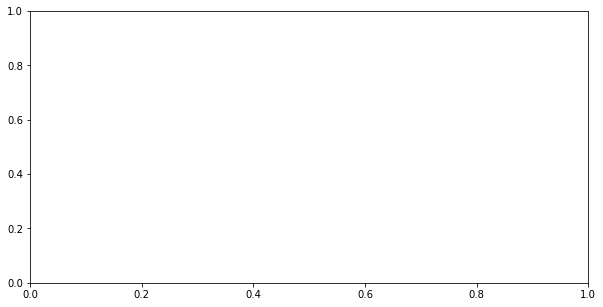

In [228]:
for c in df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();
    

2) Result of the above visualization shows that you can do the following below transformation (according to Rafa)

In [ ]:
def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[customers_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[customers_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [229]:
# Execution would be done via this code in line with pipelining at the beginning ->
# df = transform(df)

### X-Y Splitting 
splitting the target variable "total_claim_amount" from the cleaned df called df.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  datetime64[ns]
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [135]:
X=df.drop('total_claim_amount', axis=1)
y=df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['month_effective_to_date'])

### Get the numeric data


In [136]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,15.0,31,0.0,7


In [145]:
# rounding up the customer_lifetime_value column
numericals_features["customer_lifetime_value"]=numericals_features["customer_lifetime_value"].round()

In [146]:
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,9
1,2229.0,0,64,3.0,26,0.0,1
2,14948.0,22139,100,34.0,31,0.0,2
3,22332.0,49078,97,10.0,3,0.0,2
4,9025.0,23675,117,15.0,31,0.0,7


In [147]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.716685,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306
std,6885.053756,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,4014.000000,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000
50%,5775.000000,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000
75%,8991.250000,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


### Normalize via StandardScaler  -> not used going foward

In [148]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [150]:
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(numericals_features)

In [151]:
X_scaled

array([[-0.46591728,  0.34495349, -0.93586024, ...,  0.13891105,
        -0.40705101,  2.51059263],
       [-0.84065941, -1.23514692, -0.848669  , ..., -0.79208939,
        -0.40705101, -0.82535844],
       [ 1.00676119, -0.50679857,  0.19762594, ..., -0.61305085,
        -0.40705101, -0.40836456],
       ...,
       [ 2.3060125 ,  0.07544585,  3.13306451, ...,  0.53279585,
        -0.40705101, -0.40836456],
       [ 0.5745005 ,  0.87679682,  1.88332333, ..., -0.75628169,
         4.09411033,  1.25961098],
       [-0.16830231, -1.23514692,  0.22668968, ..., -1.68728213,
        -0.40705101,  0.00862933]])

### Get Categorical data

In [152]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M


In [153]:
# get dummies pandas

categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)

##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

categoricals_features.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Concatinating the Numerical and Categorical data

In [154]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,4809.0,48029,61,7.0,52,0.0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2229.0,0,64,3.0,26,0.0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,14948.0,22139,100,34.0,31,0.0,2,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,22332.0,49078,97,10.0,3,0.0,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,9025.0,23675,117,15.0,31,0.0,7,0,0,1,...,0,0,0,0,0,0,0,1,0,1


### Train Test Split (80% train & 20% test)

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [161]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
2689,2576.0,26854,66,31.0,70,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3141,7216.0,0,103,25.0,80,0.0,9,1,0,0,...,0,0,0,0,0,0,0,0,1,1
7437,2446.0,22732,62,31.0,35,0.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
8272,6746.0,70328,84,11.0,32,0.0,6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4749,4937.0,0,72,7.0,34,2.0,7,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,2601.0,80584,65,33.0,17,0.0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3843,3975.0,0,113,1.0,61,0.0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
222,2694.0,63684,68,15.0,87,0.0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4647,3123.0,0,101,1.0,83,4.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Apply Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # test model y-predictor
y_pred_train=model.predict(X_train.to_numpy()) # train y-predictor

In [199]:
# fit the model
print("Model-Intercept: ", model.intercept_)


print("Model-Coefficient: ", model.coef_)


Model-Intercept:  -365.05478530247876
Model-Coefficient:  [-2.59958403e-05 -2.76546558e-04  5.30951954e+00  4.23616353e-01
 -1.02684608e-02 -3.00123319e+00  7.45531997e-01  8.65933418e+00
  8.05414964e+00  2.20688528e+00  1.17700234e+01 -3.07466724e+01
 -1.39952710e+01 -1.82853059e+01 -6.62366472e+00 -1.09089548e+01
  1.41647022e+01 -8.73155994e+00 -6.55926207e+00  1.48930262e+01
 -4.66326055e+00  6.66845404e+01  1.54038589e+01  3.81511761e+02
  2.24863580e+02 -7.60718087e-01  7.22913835e+01  1.07693521e+00
  1.87728705e+01 -8.69678080e+00 -1.70182602e+00  5.37925927e+00
 -1.21715274e+00 -3.08517132e+00  4.38405578e+01 -1.68312892e+01
 -8.23639809e+00  1.09398962e+01  3.08856401e+00  8.51661310e-01
 -1.74002152e+00 -9.36706376e-02  1.97268037e+00  1.85712145e+01
 -3.32890096e+01 -2.26502760e+01 -2.84847625e+01 -2.22037412e-01
 -7.70782971e+00 -2.63500112e+00 -1.95377829e+00]


In [200]:
# make predictions
# 1) turn the x-values into an array

np.array([12, 33, 54, 60, 55, 32, 74, 39, 2, 39, 12, 34, 40, 21])

array([12, 33, 54, 60])

In [202]:
# make predictions
# 2) Yield the y-predictions

pred = model.predict(np.array([12, 33, 54, 60, 55, 32, 74, 39, 2, 39, 12, 34, 40, 21]).reshape(-1,1))
pred

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 51 is different from 1)

In [164]:
model.score(X_test,y_test) # Intermezzo -> checking for the robustness of the model

0.784043384704433

Text(0.5, 1.0, 'Train Residual histogram')

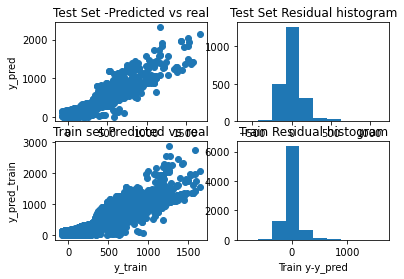

In [169]:
# first plot on the top left shows the y-predictor compared to the real y data in the test set
# we see a clear diagonal relationship which is a clear sign of a robust model

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# second plot on the top right show the error values/residuals from the above comparision distributed
# remember that the residuals have to be normally distributed as assumption Nr. 4 for OLS
# Homoscedasticity -> i.c. TRUE

ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

# Third plot on the bottom left shows the trained y-predictor compared to the real y data in the train set

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")



# Last plot on the bottom right show the error values/residuals from the above comparision distributed
# remember that the residuals have to be normally distributed as assumption Nr. 4 for OLS
# Homoscedasticity -> i.c. TRUE

ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")


### Model Validation


MSE

In [210]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(y_train,model.predict(X_train.to_numpy()))

test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 19814.094478442334 -- test MSE: 18625.07584867878


In [183]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mse

18625.07584867878

RMSE -> squaring MSE

In [185]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 140.76254643349677 -- test RMSE: 136.4737185273369


MAE

In [211]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

# Same result as for MSE

train MAE: 19814.094478442334 -- test MAE: 18625.07584867878


R2

In [188]:
r2= model.score(X_test.to_numpy(), y_test)

In [190]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

# Same result as for model.score above

train R2: 0.7678196576521559 -- test R2: 0.784043384704433


adjusted R2

In [191]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7840183259187176


### Feature Importance¶

Here we see which of the features contribute most to the value to predicting the target value. The higher its coeffient (in absolute terms) the more it does.

In [206]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [207]:
features_importances

,Attribute,Importance
23,location_code_Suburban,381.511761
24,location_code_Urban,224.863580
26,marital_status_Single,72.291384
21,employmentstatus_Unemployed,66.684540
34,policy_Special L1,43.840558
28,policy_type_Special Auto,18.772871
43,vehicle_class_Luxury Car,18.571214
22,gender_M,15.403859
19,employmentstatus_Medical Leave,14.893026
16,education_High School or Below,14.164702


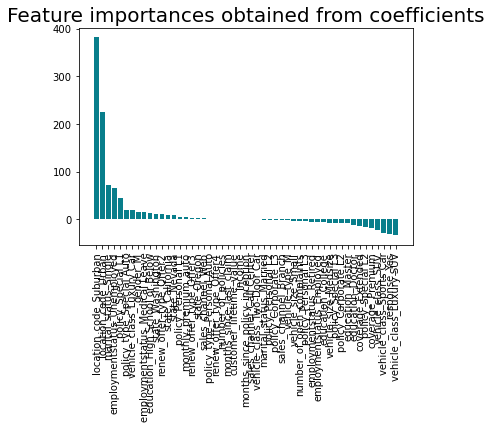

In [208]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
giving the features.

how can we use this model now in practive?

How can we visualize the model with the fitted line?

We actually have a section in the jupyter notbook. There is no one dimensional fitted line, but multi-dimensional

 include real data to estimate values. and how do we treat the standardization?
-> you need to put the data into the standardscaler again (same functions) then you can apply it again 





get models in statsmodel.